In [ ]:
# devtools::install_github("sqjin/CellChat",force = TRUE)
# BiocManager::install("BayesSpace")
# BiocManager::install("SingleCellExperiment")
# BiocManager::install("scran")

library("CellChat")
library("BayesSpace")

In [4]:
melanoma <- readRDS("~/1_spatial/spatial-datasets-master/data/rds/2018_thrane_melanoma/ST_mel1_rep2.rds")

In [6]:
# use BayesSpace for spatial clustering
set.seed(100)
dec <- scran::modelGeneVar(melanoma)
top <- scran::getTopHVGs(dec, n = 2000)

set.seed(101)
melanoma <- scater::runPCA(melanoma, subset_row = top)

## Add BayesSpace metadata
melanoma <- spatialPreprocess(melanoma, platform="ST", skip.PCA=TRUE)

q <- 4  # Number of clusters
d <- 7  # Number of PCs

set.seed(100)
melanoma <- spatialCluster(melanoma, q=q, d=d, platform='ST',
                           nrep=50000, gamma=2)

# write.csv(melanoma@colData, file='~/1_spatial/1_Tumor/BS_clustering.csv')

Neighbors were identified for 293 out of 293 spots.

Fitting model...

Calculating labels using iterations 1000 through 50000.



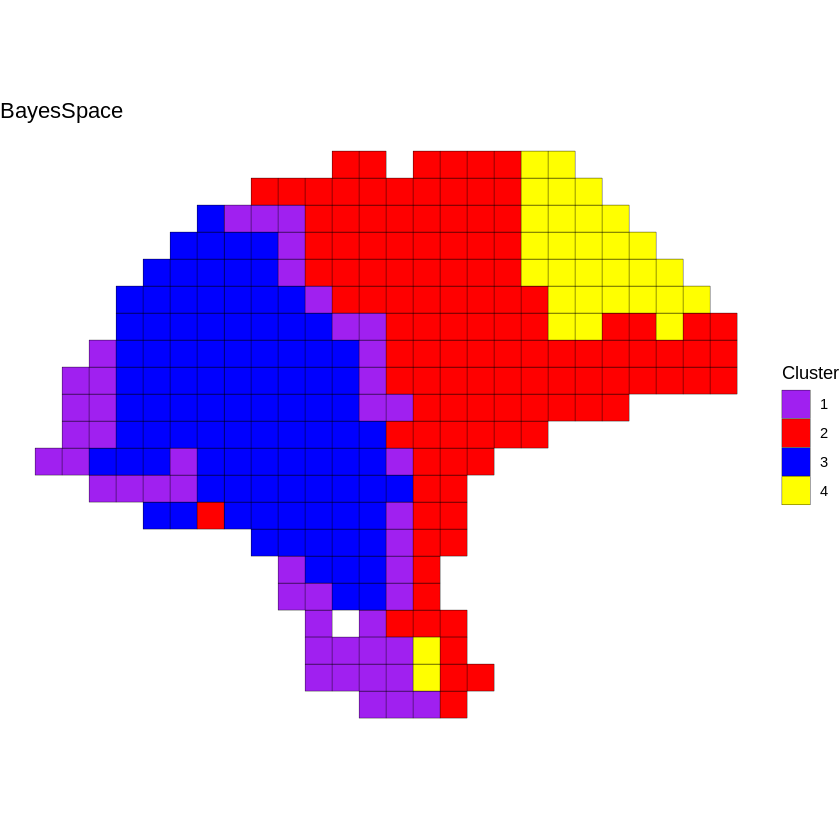

In [34]:
## View results
palette <- c("purple", "red", "blue", "yellow", "darkblue")
clusterPlot(melanoma, palette=palette, color="black", size=0.1) +
    labs(title="BayesSpace")

In [8]:
meta <- data.frame(melanoma@colData)

In [9]:
library(CellChat)
library(patchwork)

options(stringsAsFactors = FALSE)

In [10]:
data <- read.csv('melanoma/data/nul/NUL_data.csv',row.names = 1)
# data <- read.csv('melanoma/neg2pos/rescale25/RESCALE25.csv',row.names = 1)
# data <- read.csv('melanoma/neg2pos/half/HALF.csv',row.names = 1)
# data <- read.csv('melanoma/neg2pos/rescale75/RESCALE75.csv',row.names = 1)
# data <- read.csv('melanoma/neg2pos/full/FULL.csv',row.names = 1)
# data = data.frame(as.matrix(logcounts(melanoma)))    # neg ctr in melanoma shuffled set


In [11]:
colnames(data)=rownames(meta)

In [53]:
cellchat <- createCellChat(object = data.matrix(data),
                           meta = meta, group.by = "spatial.cluster")

# update database for simulated data
CellChatDB <- CellChatDB.human
II  <- read.csv('II_allpairs.csv',row.names = 1)
CellChatDB$interaction <- II
gi <- read.csv('GI_allpairs.csv',row.names = 1)
CellChatDB$geneInfo <- gi

CellChatDB.use <- CellChatDB

Create a CellChat object from a data matrix

Set cell identities for the new CellChat object



The cell groups used for CellChat analysis are  1 2 3 4 


In [ ]:
# neg ctr in melanoma shuffled set

# CellChatDB <- CellChatDB.human
# CellChatDB$interaction=CellChatDB$interaction[1:663,]

# replace the DB ligand
# neg_ls = read.csv('~/1_spatial/1_Tumor/neg_list.csv', row.names = 1)
# CellChatDB$interaction$ligand =neg_ls$ligand
# CellChatDB$interaction$receptor =neg_ls$receptor
# row.names(CellChatDB$interaction) = row.names(neg_ls)

In [ ]:
future::plan("multiprocess", workers = 50) # do parallel

CellChatDB.use <- CellChatDB
cellchat@DB <- CellChatDB.use
cellchat <- subsetData(cellchat)

In [ ]:
# default trimean
# cellchat <- identifyOverExpressedGenes(cellchat)
# cellchat <- identifyOverExpressedInteractions(cellchat)
# cellchat <- computeCommunProb(cellchat)


In [104]:
# truncatedMean
cellchat <- identifyOverExpressedGenes(cellchat,thresh.pc = -0.1,thresh.fc = -0.1, thresh.p = 1.1)
cellchat <- identifyOverExpressedInteractions(cellchat)
cellchat <- computeCommunProb(cellchat, type =  "truncatedMean", trim = 0)

In [ ]:
# write.csv(cellchat@net$pval,file='melanoma/neg2pos/rescale75/cc_pval_trunc.csv')
# write.csv(cellchat@net$pval,file='~/1_spatial/1_Tumor/CCres_real_trun.csv')